**Import necessary libraries:** This cell imports various Python libraries commonly used for data manipulation, analysis, visualization, and machine learning.
- `os`: For interacting with the operating system (not directly used in subsequent visible cells, but good practice to include if file operations might be needed).
- `numpy`: For numerical operations, especially array manipulation.
- `pandas`: For data manipulation and analysis using DataFrames.
- `matplotlib.pyplot`: For creating static, interactive, and animated visualizations.
- `seaborn`: A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import machine learning and utility modules:** This cell imports specific modules for machine learning tasks, including model selection, preprocessing, piping, and evaluation.
- `train_test_split`: To split data into training and testing sets.
- `OneHotEncoder`, `StandardScaler`, `LabelEncoder`: For data preprocessing (categorical encoding and numerical scaling).
- `ColumnTransformer`: To apply different transformers to different columns.
- `Pipeline`: To chain multiple preprocessing steps and a model together.
- `compute_class_weight`: To calculate class weights for imbalanced datasets.
- `classification_report`, `confusion_matrix`, `roc_auc_score`, `precision_recall_curve`, `auc`: For evaluating model performance.
- `joblib`: For saving and loading Python objects, often used for trained models and transformers.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc


import joblib

**Import deep learning libraries (TensorFlow/Keras):** This cell imports modules from TensorFlow, a powerful open-source library for machine learning, particularly deep learning. Keras is its high-level API for building and training neural networks.
- `tensorflow as tf`: Imports the TensorFlow library.
- `Sequential`, `Model`: Classes for defining different types of neural network models.
- `Dense`, `Dropout`, `BatchNormalization`, `Input`, `Concatenate`, `Embedding`, `Flatten`: Different types of layers used to build neural networks.
- `EarlyStopping`: A callback function to stop training early if a monitored metric stops improving.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping

**Check for imbalanced-learn library:** This cell attempts to import the `SMOTE` (Synthetic Minority Over-sampling Technique) class from the `imblearn.over_sampling` module. This library is commonly used for handling imbalanced datasets by oversampling the minority class. It sets a flag `IMBLEARN_AVAILABLE` to indicate whether the library is installed and can be used.

In [9]:
# Optional: imbalanced-learn (SMOTE) if you want to oversample
try:
    from imblearn.over_sampling import SMOTE
    IMBLEARN_AVAILABLE = True
except Exception:
    IMBLEARN_AVAILABLE = False

**Load training and testing datasets:** This cell defines the file paths for the training and testing datasets and then loads them into pandas DataFrames named `train_df` and `test_df` using `pd.read_csv()`.

In [10]:
TRAIN_PATH = '/content/UNSW_NB15_training-set.csv'
TEST_PATH = '/content/UNSW_NB15_testing-set.csv'

# Load (will raise if path incorrect)
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

**Combine training and testing data:** This cell concatenates (joins) the `train_df` and `test_df` DataFrames into a single DataFrame called `data`. `ignore_index=True` resets the index of the combined DataFrame. This is done for unified data preprocessing before splitting back into training and testing sets later.

In [11]:
data = pd.concat([train_df, test_df], ignore_index=True)

**Display combined data shape and columns:** This cell prints the dimensions (number of rows and columns) of the combined DataFrame and lists the names of all columns. This provides a quick overview of the loaded data structure.

In [12]:
print('Combined shape:', data.shape)
print('Columns:', list(data.columns))

Combined shape: (257673, 45)
Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']


**Check for duplicate rows:** This cell counts the number of duplicate rows in the combined DataFrame using the `.duplicated()` method and the `.sum()` method. This helps identify if there are any exact duplicate entries in the data.

In [13]:
# Count duplicates
num_duplicates = data.duplicated().sum()
print("Duplicate rows:", num_duplicates)

Duplicate rows: 0


**Check for missing values:** This cell checks for and prints the number of missing values (NaN or None) in each column of the DataFrame. `.isnull()` creates a boolean DataFrame indicating missing values, and `.sum()` counts them per column.

In [14]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_

**Generate descriptive statistics:** This cell provides descriptive statistics for the numerical columns in the DataFrame using the `.describe()` method. This includes count, mean, standard deviation, minimum, maximum, and quartiles, giving insights into the distribution and range of numerical features.

In [15]:
print(data.describe())

                  id            dur          spkts          dpkts  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean    72811.823858       1.246715      19.777144      18.514703   
std     48929.917641       5.974305     135.947152     111.985965   
min         1.000000       0.000000       1.000000       0.000000   
25%     32210.000000       0.000008       2.000000       0.000000   
50%     64419.000000       0.004285       4.000000       2.000000   
75%    110923.000000       0.685777      12.000000      10.000000   
max    175341.000000      59.999989   10646.000000   11018.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000   
mean   8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957   
std    1.737739e+05  1.461993e+05  1.603446e+05     102.488268     112.762131   
min    2.400000e+01  0.000000e+00  0.000000e+00       

**Display class distribution of the target variable:** This cell counts the occurrences of each unique value in the 'label' column using `.value_counts()`. This is important for understanding the balance (or imbalance) of the target variable in the dataset.

In [16]:
print("Class distribution:")
print(data['label'].value_counts())

Class distribution:
label
1    164673
0     93000
Name: count, dtype: int64


**Plot histograms of numerical features:** This cell generates histograms for all numerical features in the DataFrame using the `.hist()` method with `bins=50` (number of bins) and `figsize=(20,15)` (figure size). `plt.show()` displays the plots. Histograms visualize the distribution of individual features.

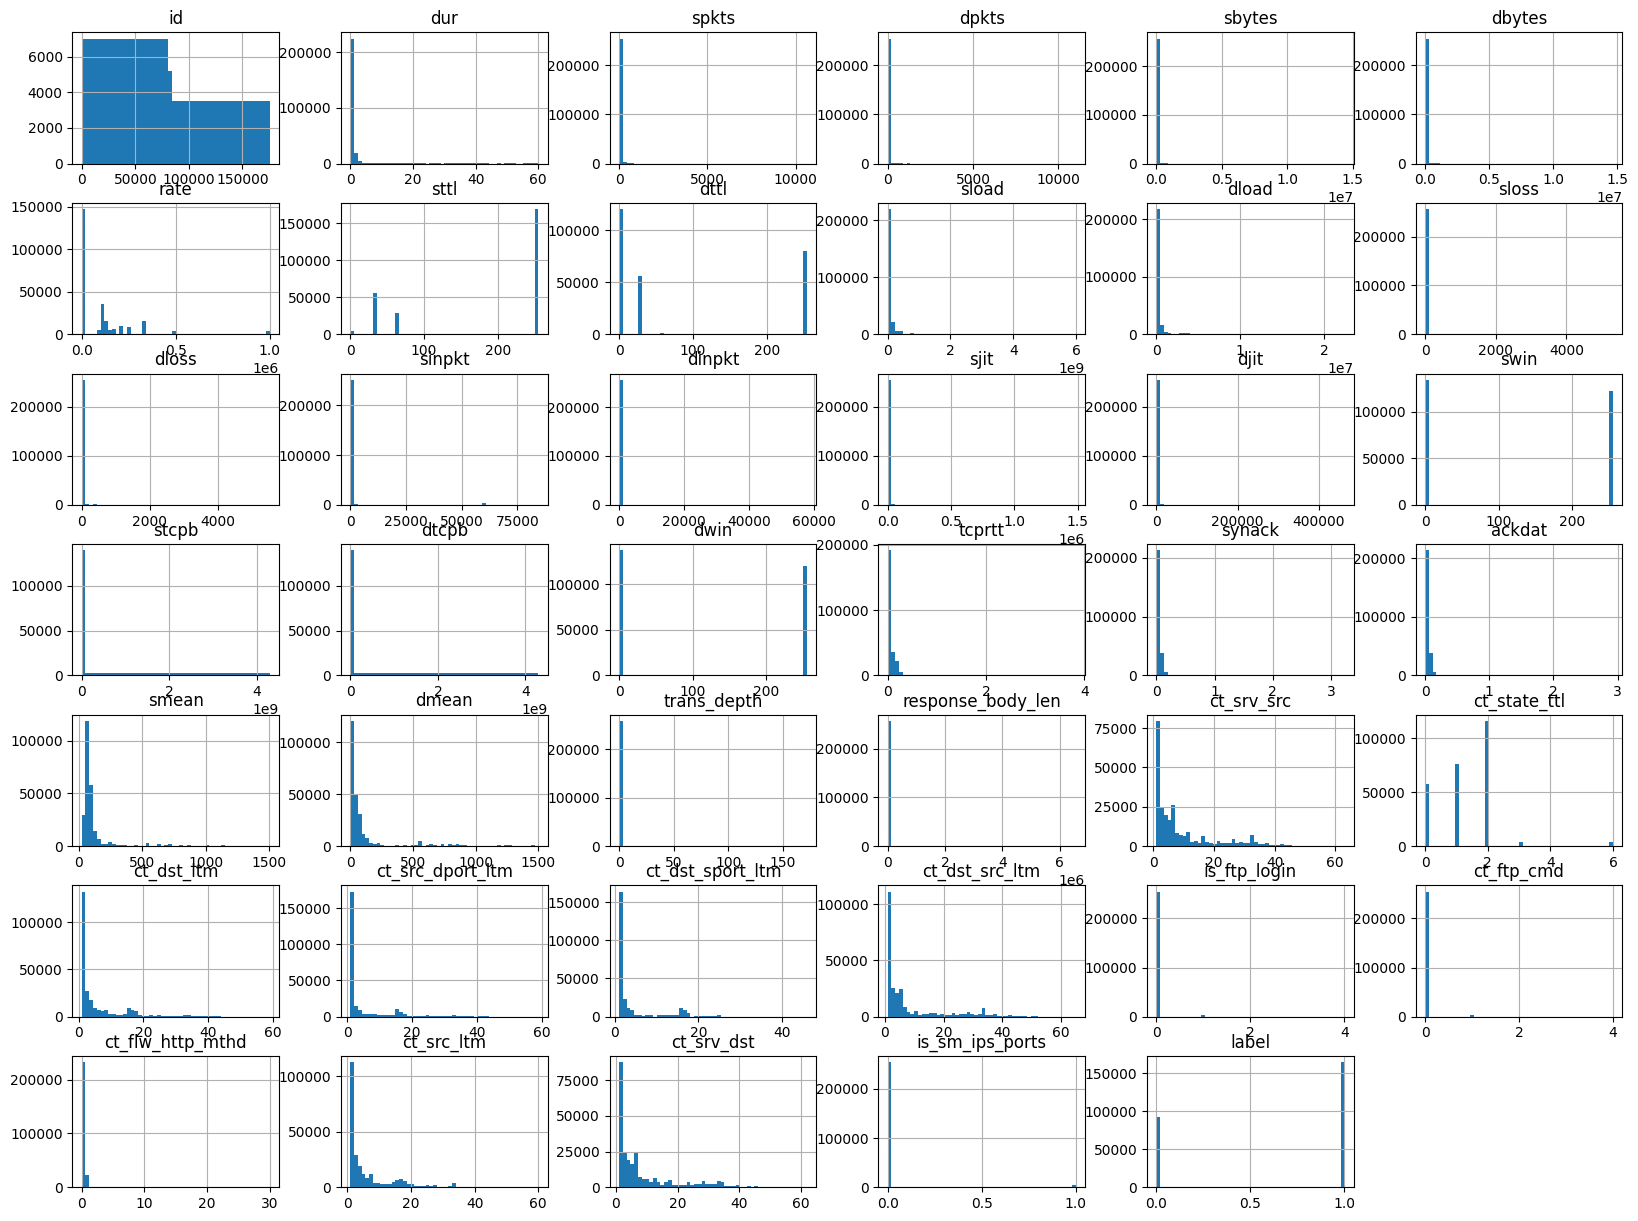

In [17]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

**Calculate and display skewness:** This cell calculates the skewness for all numerical columns using the `.skew(numeric_only=True)` method. Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. The code then prints columns with an absolute skewness greater than 1, indicating high skewness.

In [18]:
skew_vals = data.skew(numeric_only=True)
print("Skewness:\n", skew_vals[skew_vals.abs() > 1])  # focus on highly skewed

Skewness:
 dur                    8.022494
spkts                 42.521898
dpkts                 41.192776
sbytes                47.917174
dbytes                44.340233
rate                   3.380488
sload                  8.933306
dload                  4.710773
sloss                 47.120682
dloss                 46.086326
sinpkt                 8.287950
dinpkt                26.965311
sjit                  16.864546
djit                  37.496412
stcpb                  1.026446
dtcpb                  1.031027
tcprtt                 7.434696
synack                12.215821
ackdat                 8.073878
smean                  3.666593
dmean                  2.910109
trans_depth          173.162994
response_body_len     78.477279
ct_srv_src             1.637614
ct_state_ttl           1.177031
ct_dst_ltm             2.261506
ct_src_dport_ltm       2.405160
ct_dst_sport_ltm       1.959367
ct_dst_src_ltm         1.762239
is_ftp_login          10.390703
ct_ftp_cmd            10.4080

**Plot histograms for highly skewed features:** This cell specifically plots histograms for a predefined list of highly skewed columns (`skewed_cols`). It uses `seaborn.histplot()` with `kde=True` to also show the kernel density estimate, providing a smoother representation of the distribution.

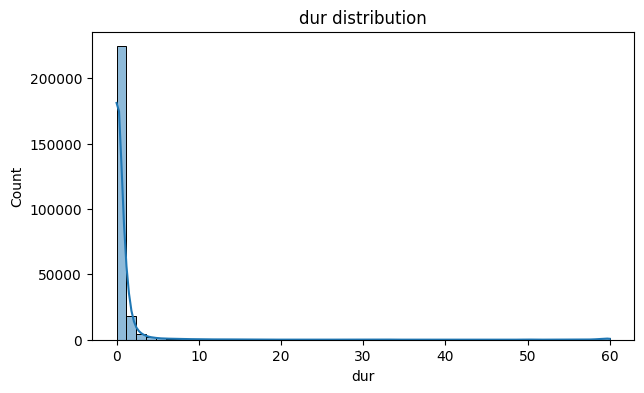

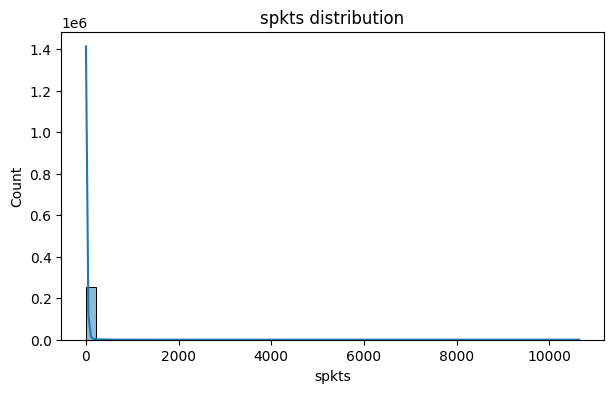

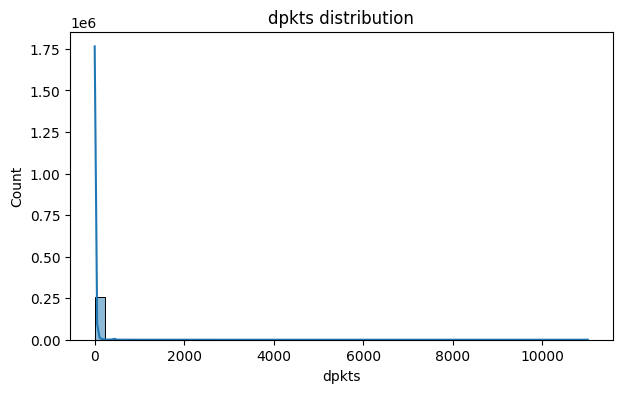

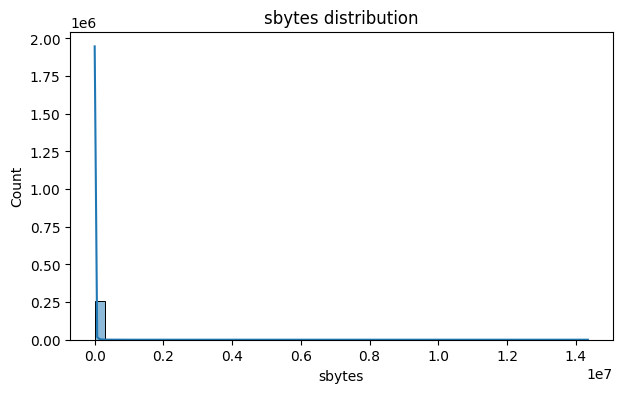

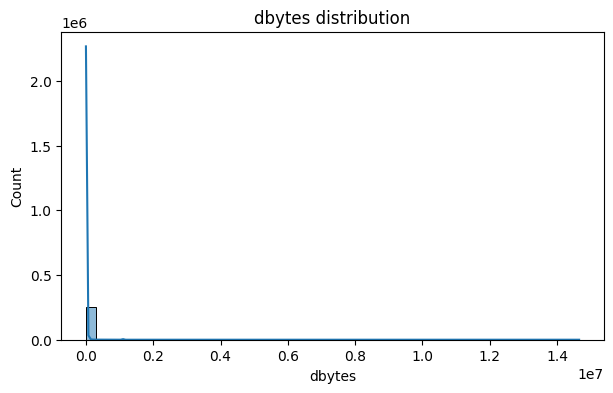

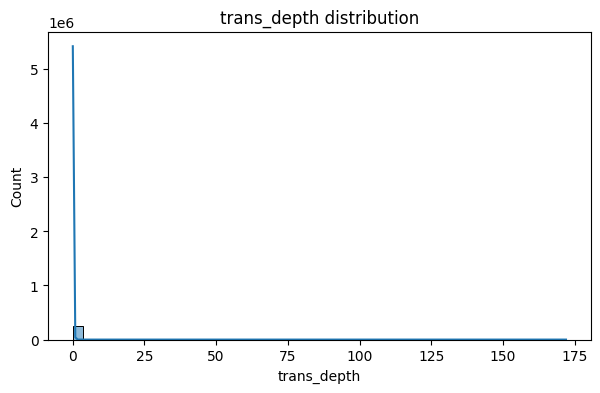

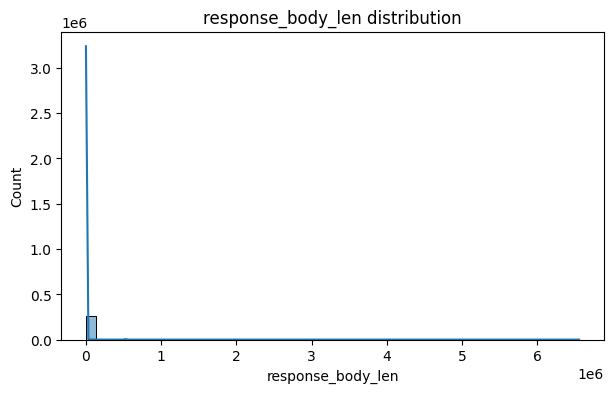

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for highly skewed features
skewed_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'trans_depth', 'response_body_len']
for col in skewed_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'{col} distribution')
    plt.show()

**Apply log1p transformation to skewed columns:** This cell applies the `np.log1p()` transformation to the highly skewed columns identified earlier. `log1p(x)` calculates `log(1 + x)`. This transformation is useful for reducing skewness in data, especially for features with values that include zero. New columns with '_log' suffix are created for the transformed data.

In [20]:
import numpy as np

for col in skewed_cols:
    data[col+'_log'] = np.log1p(data[col])

**Plot histograms and display skewness for log1p transformed features:** This cell visualizes the distribution of the log1p-transformed columns using `seaborn.histplot()`. It also calculates and prints the skewness of the transformed columns to show the effect of the transformation.

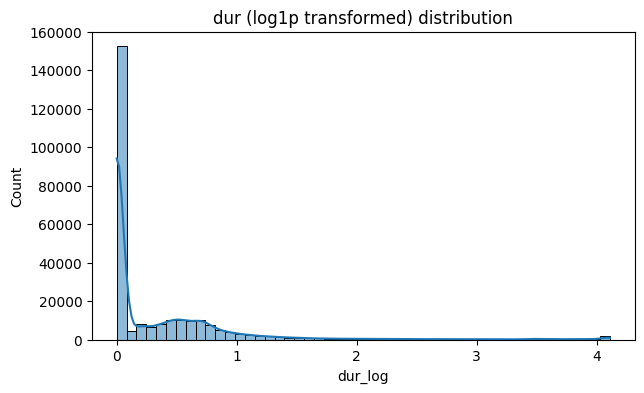

Skewness for dur_log: 3.352726156608509


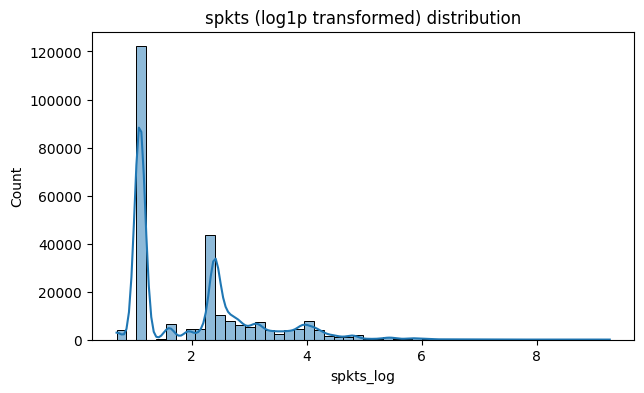

Skewness for spkts_log: 1.1045301079361416


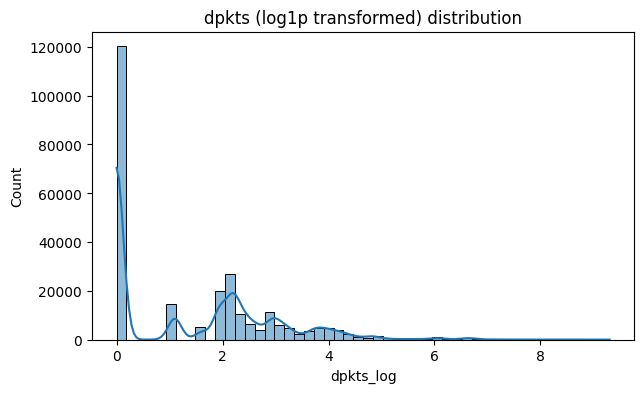

Skewness for dpkts_log: 0.7560950357443981


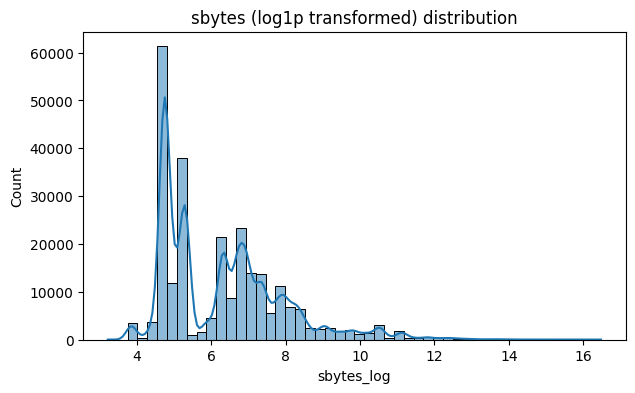

Skewness for sbytes_log: 1.1519760128043581


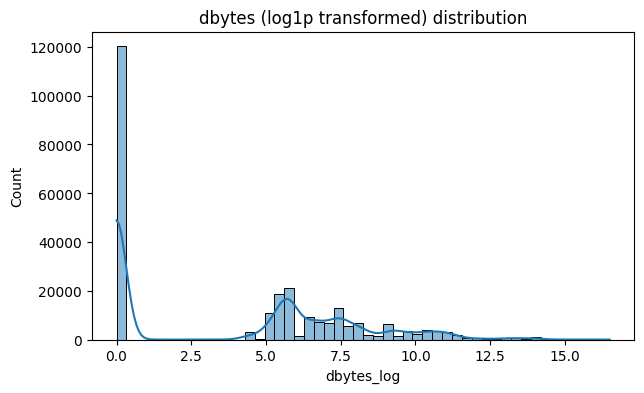

Skewness for dbytes_log: 0.3334311082182744


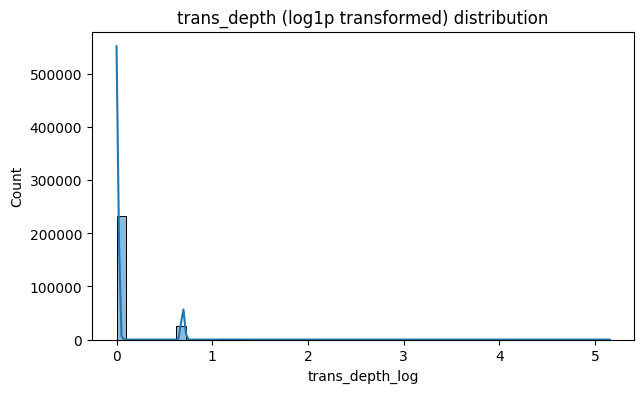

Skewness for trans_depth_log: 2.9464592184241463


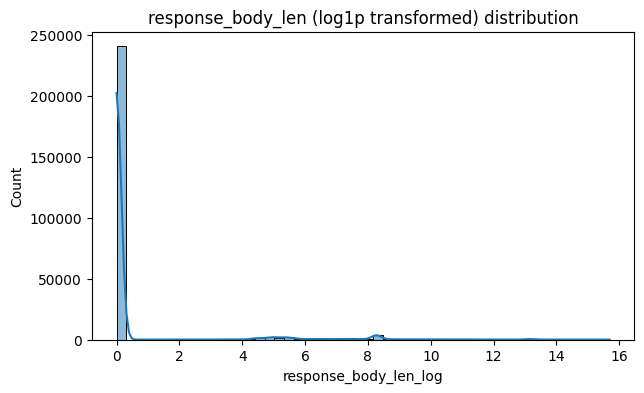

Skewness for response_body_len_log: 4.155598912688184


In [21]:
for col in skewed_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(data[col+'_log'], bins=50, kde=True)
    plt.title(f'{col} (log1p transformed) distribution')
    plt.show()
    print(f'Skewness for {col}_log: {data[col+"_log"].skew()}')

**Visualize feature correlation:** This cell calculates the correlation matrix for all numerical features using `.corr(numeric_only=True)` and visualizes it as a heatmap using `seaborn.heatmap()`. The heatmap shows the pairwise correlation between features, helping identify highly correlated features which might be redundant.

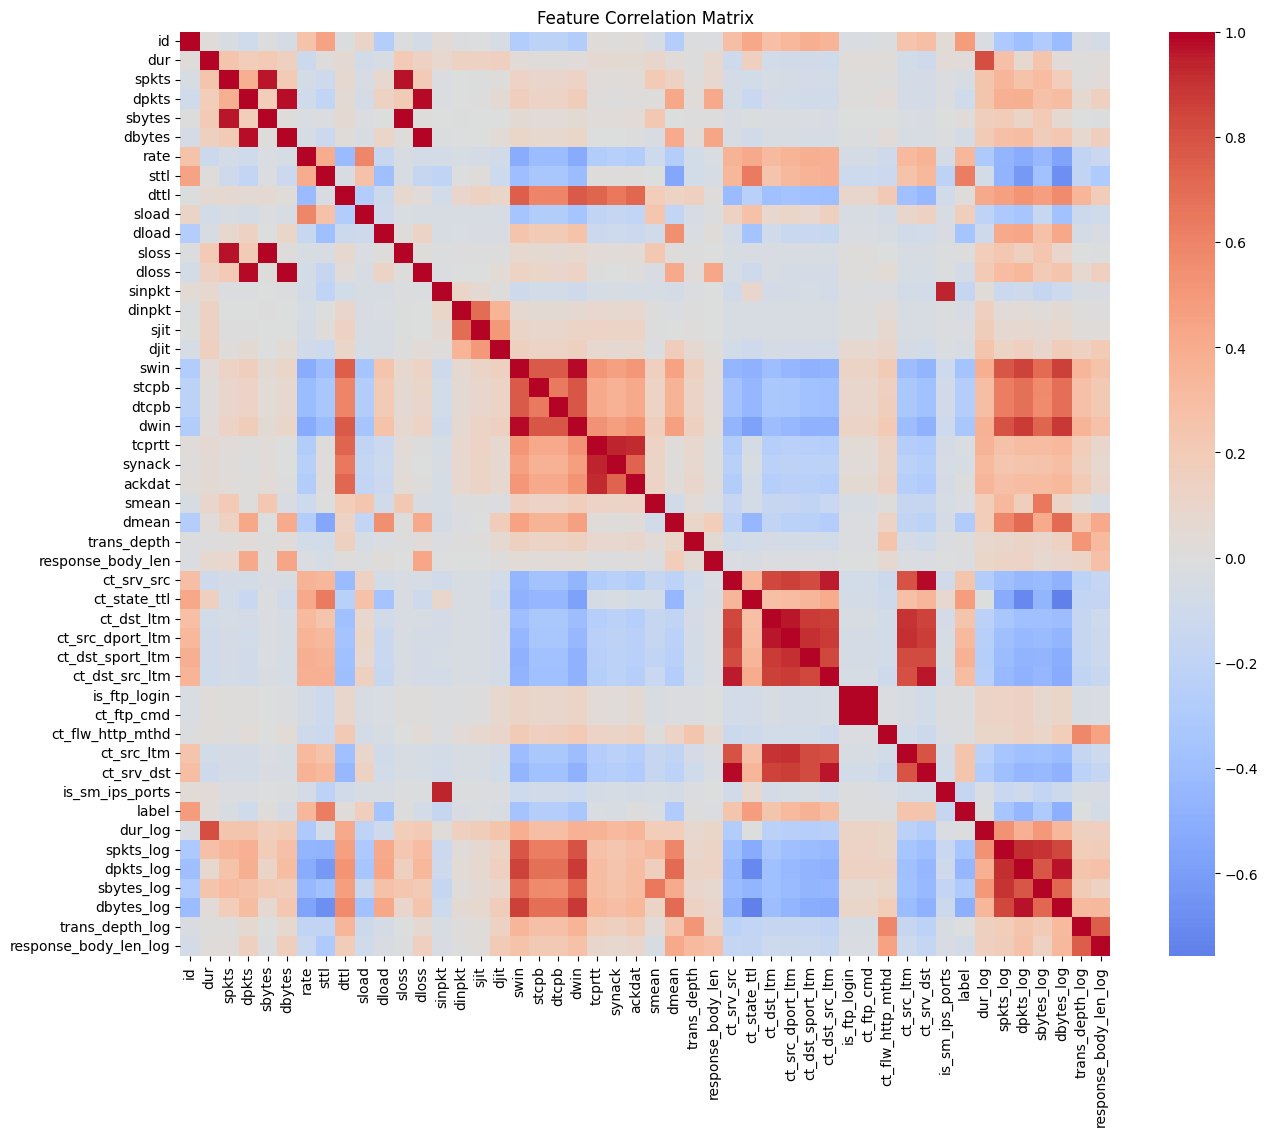

In [22]:
import seaborn as sns
import numpy as np

corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

**Drop selected columns:** This cell defines a list of columns to be dropped from the DataFrame. It checks which of these columns actually exist in the DataFrame before dropping them using `.drop(columns=existing_to_drop, inplace=True)`. This step removes features that are deemed irrelevant or redundant based on prior analysis.

In [23]:
# List of intended columns to drop
columns_to_drop = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'sbytes', 'dbytes', 'sloss',
    'service', 'sload', 'dload', 'spkts', 'stcpb', 'dtcpb', 'trans_depth',
    'res_bdy_len', 'sjit', 'djit', 'sintpkt', 'dintpkt', 'ct_flw_http_mthd', 'is_ftp_login',
    'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm','attack_cat'
]

# Only keep those actually present in the DataFrame
existing_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=existing_to_drop, inplace=True)
print("Dropped columns:", existing_to_drop)
print("Remaining columns:", data.columns.tolist())

Dropped columns: ['proto', 'sbytes', 'dbytes', 'sloss', 'service', 'sload', 'dload', 'spkts', 'stcpb', 'dtcpb', 'trans_depth', 'sjit', 'djit', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat']
Remaining columns: ['id', 'dur', 'state', 'dpkts', 'rate', 'sttl', 'dttl', 'dloss', 'sinpkt', 'dinpkt', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'response_body_len', 'ct_state_ttl', 'is_sm_ips_ports', 'label', 'dur_log', 'spkts_log', 'dpkts_log', 'sbytes_log', 'dbytes_log', 'trans_depth_log', 'response_body_len_log']


**Apply Label Encoding and One-Hot Encoding to categorical features:** This cell demonstrates two common techniques for encoding categorical features.
- **Label Encoding:** It applies `LabelEncoder` to the 'state' column, converting each unique category into a numerical label. A dictionary `label_encoders` stores the fitted encoders.
- **One-Hot Encoding:** It then applies `OneHotEncoder` to the 'state' column, creating a new binary column for each unique category. `sparse_output=False` ensures a dense NumPy array is returned. `handle_unknown='ignore'` prevents errors during transformation if an unseen category is encountered.

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
label_encoders = {}
for col in ['state']:
    le = LabelEncoder()
    data[col+'_encoded'] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"{col} classes: {le.classes_}")

# One-hot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_arr = encoder.fit_transform(data[['state']])
print("Shape after one-hot:", onehot_arr.shape)

state classes: ['ACC' 'CLO' 'CON' 'ECO' 'FIN' 'INT' 'PAR' 'REQ' 'RST' 'URN' 'no']
Shape after one-hot: (257673, 11)


**Standardize numerical features:** This cell standardizes all numerical features in the DataFrame (except the 'label' column) using `StandardScaler`. Standardization (Z-score normalization) transforms the data to have zero mean and unit variance, which is important for many machine learning algorithms.

In [25]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('label')

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print("Numeric data standardized.")
print(data[numeric_cols].describe())

Numeric data standardized.
                 id           dur         dpkts          rate          sttl  \
count  2.576730e+05  2.576730e+05  2.576730e+05  2.576730e+05  2.576730e+05   
mean   1.041246e-16  1.003743e-17 -1.698643e-17  1.323618e-16  2.144260e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.488066e+00 -2.086799e-01 -1.653309e-01 -5.691122e-01 -1.756311e+00   
25%   -8.297971e-01 -2.086786e-01 -1.653309e-01 -5.689202e-01 -1.151363e+00   
50%   -1.715278e-01 -2.079627e-01 -1.474715e-01 -5.506790e-01  7.220262e-01   
75%    7.788946e-01 -9.389195e-02 -7.603381e-02  2.104601e-01  7.220262e-01   
max    2.095433e+00  9.834346e+00  9.822219e+01  5.667466e+00  7.317834e-01   

               dttl         dloss        sinpkt        dinpkt          swin  \
count  2.576730e+05  2.576730e+05  2.576730e+05  2.576730e+05  2.576730e+05   
mean  -8.824117e-17 -9.044720e-18 -9.706529e-18  1.103015e-18  3.176682e-17   
std    1.000002e+00  1.0

**Standardize remaining numerical columns and drop original skewed features:** This cell refines the standardization process. It identifies all numerical columns (including log-transformed ones), excludes the original highly skewed columns and the 'label', and then applies `StandardScaler`. Finally, it drops the original highly skewed columns that were replaced by their log-transformed versions.

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Identify numerical columns, including the new log-transformed ones
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Define the original skewed columns
original_skewed_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'trans_depth', 'response_body_len']

# Identify numerical columns to scale (all numerical except the original skewed ones and 'label')
numerical_cols_to_scale = [col for col in numerical_cols if col not in original_skewed_cols and col != 'label']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected numerical columns
data[numerical_cols_to_scale] = scaler.fit_transform(data[numerical_cols_to_scale])

# Identify which of the original skewed columns are still in the DataFrame
existing_original_skewed_cols = [col for col in original_skewed_cols if col in data.columns]

# Drop the original highly skewed columns that still exist
if existing_original_skewed_cols:
    data = data.drop(columns=existing_original_skewed_cols)

print("Data after standardizing all relevant numerical columns (excluding 'label') and dropping original skewed columns:")
display(data.head())

Data after standardizing all relevant numerical columns (excluding 'label') and dropping original skewed columns:


,id,state,rate,sttl,dttl,dloss,sinpkt,dinpkt,swin,dwin,...,is_sm_ips_ports,label,dur_log,spkts_log,dpkts_log,sbytes_log,dbytes_log,trans_depth_log,response_body_len_log,state_encoded
0,-1.488066,FIN,-0.568650,0.702512,1.500906,-0.125576,-0.128285,-0.082757,1.046159,1.066927,...,-0.120335,0,-0.354011,-0.074419,0.131867,-0.450373,0.324362,-0.328818,-0.252345,-0.384788
1,-1.488046,FIN,-0.568623,-1.151363,1.483170,0.190985,-0.124584,-0.076306,1.046159,1.066927,...,-0.120335,0,0.260006,0.603007,1.472025,0.184678,1.726711,-0.328818,-0.252345,-0.384788
2,-1.488025,FIN,-0.569024,-1.151363,1.483170,-0.013848,-0.098297,0.003493,1.046159,1.066927,...,-0.120335,0,0.997415,0.148961,0.930287,-0.241497,1.430846,-0.328818,-0.252345,-0.384788
3,-1.488005,FIN,-0.569027,-1.151363,1.483170,-0.069712,-0.109709,-0.007934,1.046159,1.066927,...,-0.120335,0,1.032502,0.475812,0.755265,0.089857,0.705913,-0.328818,-0.252345,-0.384788
4,-1.487985,FIN,-0.568904,0.722026,1.483170,-0.106955,-0.124896,-0.021257,1.046159,1.066927,...,-0.120335,0,0.053999,0.327326,0.351389,-0.008693,0.437066,-0.328818,-0.252345,-0.384788


**Display the first few rows of the processed data:** This cell simply displays the head of the DataFrame `data` after the preprocessing steps. This allows for a quick visual check of the data's structure and values.

In [27]:
data.head()

,id,state,rate,sttl,dttl,dloss,sinpkt,dinpkt,swin,dwin,...,is_sm_ips_ports,label,dur_log,spkts_log,dpkts_log,sbytes_log,dbytes_log,trans_depth_log,response_body_len_log,state_encoded
0,-1.488066,FIN,-0.568650,0.702512,1.500906,-0.125576,-0.128285,-0.082757,1.046159,1.066927,...,-0.120335,0,-0.354011,-0.074419,0.131867,-0.450373,0.324362,-0.328818,-0.252345,-0.384788
1,-1.488046,FIN,-0.568623,-1.151363,1.483170,0.190985,-0.124584,-0.076306,1.046159,1.066927,...,-0.120335,0,0.260006,0.603007,1.472025,0.184678,1.726711,-0.328818,-0.252345,-0.384788
2,-1.488025,FIN,-0.569024,-1.151363,1.483170,-0.013848,-0.098297,0.003493,1.046159,1.066927,...,-0.120335,0,0.997415,0.148961,0.930287,-0.241497,1.430846,-0.328818,-0.252345,-0.384788
3,-1.488005,FIN,-0.569027,-1.151363,1.483170,-0.069712,-0.109709,-0.007934,1.046159,1.066927,...,-0.120335,0,1.032502,0.475812,0.755265,0.089857,0.705913,-0.328818,-0.252345,-0.384788
4,-1.487985,FIN,-0.568904,0.722026,1.483170,-0.106955,-0.124896,-0.021257,1.046159,1.066927,...,-0.120335,0,0.053999,0.327326,0.351389,-0.008693,0.437066,-0.328818,-0.252345,-0.384788


**Apply One-Hot Encoding to the 'state' column:** This cell performs One-Hot Encoding specifically on the 'state' column. It uses `OneHotEncoder` to create new binary columns for each unique state value. The original 'state' column is then dropped, and the new one-hot encoded columns are concatenated to the DataFrame.

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
# handle_unknown='ignore' will ignore categories not seen during fit, useful for consistent test sets
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'state' column
state_encoded = onehot_encoder.fit_transform(data[['state']])

# Create a DataFrame from the one-hot encoded array
state_encoded_df = pd.DataFrame(state_encoded, columns=onehot_encoder.get_feature_names_out(['state']))

# Concatenate the new one-hot encoded columns to the original DataFrame
data = pd.concat([data, state_encoded_df], axis=1)

# Drop the original 'state' column
data = data.drop('state', axis=1)

print("Data after one-hot encoding 'state' column:")
display(data.head())

Data after one-hot encoding 'state' column:


,id,rate,sttl,dttl,dloss,sinpkt,dinpkt,swin,dwin,tcprtt,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,-1.488066,-0.568650,0.702512,1.500906,-0.125576,-0.128285,-0.082757,1.046159,1.066927,-0.495523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.488046,-0.568623,-1.151363,1.483170,0.190985,-0.124584,-0.076306,1.046159,1.066927,-0.495523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.488025,-0.569024,-1.151363,1.483170,-0.013848,-0.098297,0.003493,1.046159,1.066927,0.708860,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.488005,-0.569027,-1.151363,1.483170,-0.069712,-0.109709,-0.007934,1.046159,1.066927,-0.495523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.487985,-0.568904,0.722026,1.483170,-0.106955,-0.124896,-0.021257,1.046159,1.066927,0.886283,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Construct feature and label arrays:** This cell separates the DataFrame into features (`X`) and the target variable (`y`). It creates a list of feature columns by excluding the 'label' column and any original attack category columns. `X` contains the feature values as a NumPy array, and `y` contains the label values as a NumPy array.

In [29]:
# Construct X/y with encoded features and standardized numerical features
# Exclude 'label' and any potentially lingering original categorical columns not used for OHE
feature_cols = [col for col in data.columns if col not in ['label', 'attack_cat', 'attack_cat_encoded']] # 'state' is now one-hot encoded
X = data[feature_cols].values
y = data['label'].values # Ensure 'label' is not standardized

print("Feature array shape:", X.shape)
print("Label array length:", y.shape)

Feature array shape: (257673, 35)
Label array length: (257673,)


**Split data into training and testing sets:** This cell splits the feature array (`X`) and label array (`y`) into training and testing sets using `train_test_split`. `test_size=0.3` allocates 30% of the data for testing, `random_state=42` ensures reproducibility, and `stratify=y` maintains the same class distribution in both the training and testing sets as in the original data.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
print("Train set:", X_train.shape, "Test set:", X_test.shape)

Train set: (180371, 35) Test set: (77302, 35)


**Display label distribution in train and test sets:** This cell uses `np.bincount()` to count the number of instances for each class (0 and 1) in the training and testing label sets. This confirms that the stratification during the split was successful in preserving the class distribution.

In [31]:
import numpy as np

print("Train label distribution:", np.bincount(y_train.astype(int)))
print("Test label distribution:", np.bincount(y_test.astype(int)))

Train label distribution: [ 65100 115271]
Test label distribution: [27900 49402]


**Define and compile the neural network model:** This cell defines the architecture of a sequential neural network model using TensorFlow/Keras.
- It's a `Sequential` model, meaning layers are stacked linearly.
- It has two hidden `Dense` layers with ReLU activation, followed by `BatchNormalization` and `Dropout` for regularization.
- The output layer is a `Dense` layer with one unit and a `sigmoid` activation function, suitable for binary classification.
- The model is compiled with the `adam` optimizer, `binary_crossentropy` loss function, and metrics like `accuracy`, `Precision`, `Recall`, and `AUC` to evaluate performance during training.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf

# Define the model architecture
model = Sequential([
    # Input layer and first hidden layer
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(), # Add BatchNormalization
    Dropout(0.3), # Add Dropout for regularization

    # Second hidden layer
    Dense(64, activation='relu'),
    BatchNormalization(), # Add BatchNormalization
    Dropout(0.3), # Add Dropout for regularization

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Suitable for binary classification
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]) # Add relevant metrics

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 384 (1.50 KB)

**Train the neural network model:** This cell trains the compiled neural network model using the training data (`X_train`, `y_train`).
- `epochs=50`: Specifies the maximum number of training epochs.
- `batch_size=32`: Sets the number of samples per gradient update.
- `validation_split=0.2`: Uses 20% of the training data for validation during training.
- `class_weight=class_weight_dict`: Applies class weights to handle the imbalance in the target variable, giving more importance to the minority class.
- `callbacks=[early_stopping]`: Includes the `EarlyStopping` callback to prevent overfitting by stopping training when the validation loss stops improving.

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights for handling imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', # Monitor validation loss
                               patience=5,         # Stop after 5 epochs if val_loss doesn't improve
                               restore_best_weights=True) # Restore best weights found during training

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,          # You can adjust the number of epochs
                    batch_size=32,     # You can adjust the batch size
                    validation_split=0.2, # Use 20% of training data for validation
                    class_weight=class_weight_dict, # Add class weights
                    callbacks=[early_stopping]) # Add Early Stopping callback

print("Model training finished.")

Class weights: {0: np.float64(1.3853379416282643), 1: np.float64(0.7823780482515117)}
Epoch 1/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8830 - auc: 0.9559 - loss: 0.2595 - precision: 0.9267 - recall: 0.8874 - val_accuracy: 0.9170 - val_auc: 0.9817 - val_loss: 0.1650 - val_precision: 0.9668 - val_recall: 0.9001
Epoch 2/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9070 - auc: 0.9754 - loss: 0.1946 - precision: 0.9514 - recall: 0.9009 - val_accuracy: 0.9146 - val_auc: 0.9833 - val_loss: 0.1653 - val_precision: 0.9757 - val_recall: 0.8877
Epoch 3/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9097 - auc: 0.9774 - loss: 0.1861 - precision: 0.9546 - recall: 0.9017 - val_accuracy: 0.9108 - val_auc: 0.9837 - val_loss: 0.1670 - val_precision: 0.9779 - val_recall: 0.8794
Epoch 4/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9133 - auc: 0.9786 - loss: 0.1802 - precision: 0.9592 - recall: 0.9027 - val_accuracy: 0.9249 - val_auc: 0.984

**Evaluate the model on the test set:** This cell evaluates the trained model's performance on the unseen test set (`X_test`, `y_test`) using the `.evaluate()` method. It reports the test loss and the metrics specified during compilation (accuracy, precision, recall, and AUC).

In [34]:
# Evaluate the model on the test set
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test AUC: {auc:.4f}")

Test Loss: 0.1055
Test Accuracy: 0.9569
Test Precision: 0.9812
Test Recall: 0.9508
Test AUC: 0.9927


**Generate predictions on the test set:** This cell uses the trained model to predict the probability of the positive class for each sample in the test set using the `.predict()` method. It then converts these probabilities into binary class labels (0 or 1) by applying a threshold of 0.5.

In [35]:
import numpy as np

# Get predicted probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (0 or 1) using a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Sample predicted probabilities:", y_pred_prob[:10].flatten())
print("Sample predicted labels:", y_pred[:10].flatten())

2416/2416 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Sample predicted probabilities: [1.5799781e-06 1.8462493e-05 5.1504833e-07 1.0348273e-04 9.9990392e-01
 2.0792377e-06 1.7203481e-01 9.8439761e-02 9.9999911e-01 9.7559398e-01]
Sample predicted labels: [0 0 0 0 1 0 0 0 1 1]


**Generate and visualize the confusion matrix:** This cell calculates the confusion matrix using `confusion_matrix` from scikit-learn. It then visualizes the confusion matrix as a heatmap using `seaborn.heatmap()`. The confusion matrix helps assess the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

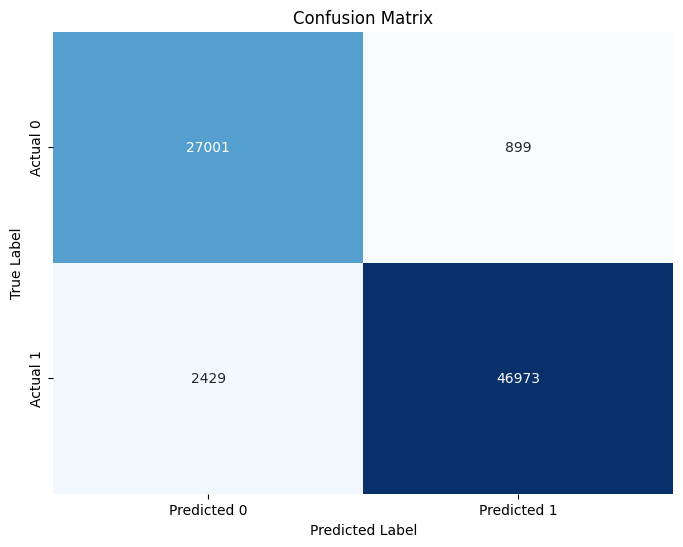

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Generate and display the classification report:** This cell generates a detailed classification report using `classification_report` from scikit-learn. The classification report includes key metrics like precision, recall, F1-score, and support for each class, as well as overall accuracy. This provides a comprehensive evaluation of the model's performance.

In [52]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     27900
           1       0.98      0.95      0.97     49402

    accuracy                           0.96     77302
   macro avg       0.95      0.96      0.95     77302
weighted avg       0.96      0.96      0.96     77302



In [53]:
import joblib

# Save the trained model
model_filename = 'trained_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as trained_model.pkl


In [54]:
from google.colab import files

# Download the saved model file
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>